In [2]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=[]

env: CUDA_VISIBLE_DEVICES=[]


### Mouse USVs
Source:
- https://sites.google.com/view/rtachi/resources

In [3]:
from pathlib2 import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
import IPython
from avgn.utils.paths import DATA_DIR, ensure_dir

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [6]:
from avgn.signalprocessing import spectrogramming as sg

In [7]:
import pdb
from joblib import Parallel, delayed
n_jobs = 10
verbosity = 5

In [11]:
from tqdm.autonotebook import tqdm
from librosa.core.time_frequency import mel_frequencies
from avgn.signalprocessing.spectrogramming_tf import spectrogram_tensorflow
from avgn.utils.audio import load_wav, float32_to_int16, int16_to_float32, write_wav
from avgn.visualization.spectrogram import visualize_spec, plot_spec
from avgn.signalprocessing.filtering import butter_bandpass_filter

### data locations

In [15]:
DSLOC = DATA_DIR/"raw/rodent/zip_contents"

In [16]:
CSVs = list(DSLOC.glob('*/*.csv'))
CSVs[:2]

[PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/raw/rodent/zip_contents/rat_distressed/20181026_150742_384K_1Ch_a58_r.csv'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/raw/rodent/zip_contents/rat_distressed/20181026_145634_384K_1Ch_a57_r.csv')]

In [76]:
len(CSVs)

21

In [75]:
CSVs

[PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/raw/rodent/zip_contents/rat_distressed/20181026_150742_384K_1Ch_a58_r.csv'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/raw/rodent/zip_contents/rat_distressed/20181026_145634_384K_1Ch_a57_r.csv'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/raw/rodent/zip_contents/rat_distressed/20181026_142935_384K_1Ch_a55_r.csv'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/raw/rodent/zip_contents/rat_distressed/20181026_153035_384K_1Ch_a60_r.csv'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/raw/rodent/zip_contents/mouse_C57BL/L_3_1vsBBE2.csv'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/raw/rodent/zip_contents/mouse_C57BL/B_140513Aco59_2Home2.csv'),
 PosixPath('/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/raw/rodent/zip_contents/mouse_C57BL/C_140526Can15-1test1_1Home.csv'),
 PosixPath('/mnt/cub

In [ ]:
'/mnt/cube/tsainbur/Projects/github_repos/avgn_paper/data/raw/rodent/zip_contents/'

In [22]:
len(CSVs)

21

In [47]:
all_vocs = []
for csv in CSVs:
    voc = pd.read_csv(csv,header=None)[[0,1]]
    voc.columns = ['start_time', 'end_time']
    voc['csv'] = csv
    all_vocs.append(voc)
    #print(len(voc))
voc_df = pd.concat(all_vocs)

In [48]:
len(voc_df)

3861

In [49]:
voc_df[:3]

,start_time,end_time,csv
0,11.870,12.514,/mnt/cube/tsainbur/Projects/github_repos/avgn_...
1,12.718,13.326,/mnt/cube/tsainbur/Projects/github_repos/avgn_...
2,13.667,14.207,/mnt/cube/tsainbur/Projects/github_repos/avgn_...


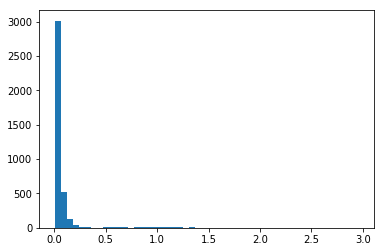

In [50]:
plt.hist(voc_df.end_time.values - voc_df.start_time.values, bins=50);

In [52]:
row = voc_df.iloc[0]
row

start_time                                                11.87
end_time                                                 12.514
csv           /mnt/cube/tsainbur/Projects/github_repos/avgn_...
Name: 0, dtype: object

In [60]:
wav = row.csv.parent / (row.csv.stem + '.wav')

In [62]:
rate, data = load_wav(wav)
rate

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


384000

In [69]:
syll = data[int(rate*row.start_time): int(rate*row.end_time)]

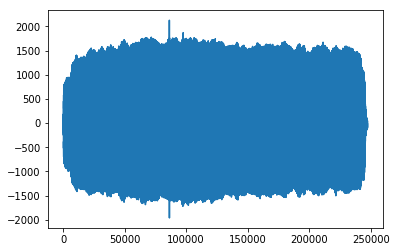

In [70]:
plt.plot(syll)

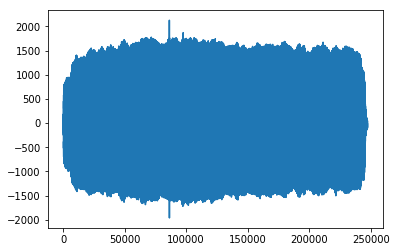

In [74]:
plt.plot(syll)
IPython.display.Audio(data=syll, rate=int(rate/10))